In [1]:
import pandas as pd
import pprint as pp
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
data_path = "../../resources/science-data/"
gw_df = pd.read_csv(data_path + "global_warming.csv")
gw_meta_df = pd.read_csv(data_path + "global_warming_meta.csv")
fips_df = pd.read_csv(data_path + "fips_state.csv")
mask_df = pd.read_csv(data_path + "mask-use-by-county.csv")
rona_df = pd.read_csv(data_path + "jh_cases_deaths.csv")

In [3]:
# happening = gw_df[['']]
gw_df = gw_df.groupby('GeoType').get_group('State')
gw_df = gw_df[['GeoType', 'GEOID', 'happening', 'happeningOppose', 'human', 'humanOppose']]
gw_df = gw_df.rename(columns={'happening': 'GW-Happening', 'happeningOppose': 'GW-Not-Happening', 'human': 'GW-Human-Caused', 'humanOppose': 'GW-Not-Human-Caused'})
gw_df.head()

,GeoType,GEOID,GW-Happening,GW-Not-Happening,GW-Human-Caused,GW-Not-Human-Caused
1,State,1,63.347,14.144,50.909,37.789
2,State,2,70.159,13.810,53.769,35.449
3,State,4,70.853,12.796,56.019,33.452
4,State,5,65.637,14.500,52.163,36.722
5,State,6,77.228,8.262,63.753,26.735


In [135]:
mask_df = mask_df.rename(columns={'COUNTYFP': 'County', 'NEVER': 'Mask-Never', 'RARELY': 'Mask-Rarely', 'SOMETIMES': 'Mask-Sometimes', 'FREQUENTLY': 'Mask-Frequent', 'ALWAYS': 'Mask-Always'})
mask_df.head()

,County,Mask-Never,Mask-Rarely,Mask-Sometimes,Mask-Frequent,Mask-Always
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


In [137]:
rona_df = rona_df[['fips_code', 'total_population', 'confirmed', 'confirmed_per_100000', 'deaths', 'deaths_per_100000']]
rona_df = rona_df.rename(columns={'total_population': 'Population', 'confirmed': 'Cases', 'confirmed_per_100000': 'Cases Per 100k', 'deaths': 'Deaths', 'deaths_per_100000': 'Deaths Per 100k' })

In [192]:
rona_df = rona_df.dropna(subset=['fips_code', 'Population'])
rona_df['fips_code'] = rona_df['fips_code'].astype('int32')
rona_df['Population'] = rona_df['Population'].astype('int32')

In [193]:
rona_df.head()

,fips_code,Population,Cases,Cases Per 100k,Deaths,Deaths Per 100k
0,1001,55200,2048,3710.14,31,56.16
1,1003,208107,6637,3189.22,69,33.16
2,1005,25782,1031,3998.91,9,34.91
3,1007,22527,828,3675.59,14,62.15
4,1009,57645,1925,3339.40,25,43.37


In [140]:
df = mask_df.merge(gw_df, how='inner', left_on='County', right_on='GEOID')
df = df.drop(['GeoType', 'GEOID'], axis=1)
df.head()

,County,Mask-Never,Mask-Rarely,Mask-Sometimes,Mask-Frequent,Mask-Always,GW-Happening,GW-Not-Happening,GW-Human-Caused,GW-Not-Human-Caused
0,1001,0.053,0.074,0.134,0.295,0.444,58.925,17.910,46.619,41.905
1,1003,0.083,0.059,0.098,0.323,0.436,60.590,19.028,46.056,41.122
2,1005,0.067,0.121,0.120,0.201,0.491,66.975,10.476,51.662,38.378
3,1007,0.020,0.034,0.096,0.278,0.572,57.679,18.117,44.925,43.474
4,1009,0.053,0.114,0.180,0.194,0.459,52.372,23.976,43.147,43.863


In [141]:
df = df.merge(rona_df, how='inner', left_on='County', right_on='fips_code')
df.head()

,County,Mask-Never,Mask-Rarely,Mask-Sometimes,Mask-Frequent,Mask-Always,GW-Happening,GW-Not-Happening,GW-Human-Caused,GW-Not-Human-Caused,fips_code,Population,Cases,Cases Per 100k,Deaths,Deaths Per 100k
0,1001,0.053,0.074,0.134,0.295,0.444,58.925,17.910,46.619,41.905,1001,55200.0,2048,3710.14,31,56.16
1,1003,0.083,0.059,0.098,0.323,0.436,60.590,19.028,46.056,41.122,1003,208107.0,6637,3189.22,69,33.16
2,1005,0.067,0.121,0.120,0.201,0.491,66.975,10.476,51.662,38.378,1005,25782.0,1031,3998.91,9,34.91
3,1007,0.020,0.034,0.096,0.278,0.572,57.679,18.117,44.925,43.474,1007,22527.0,828,3675.59,14,62.15
4,1009,0.053,0.114,0.180,0.194,0.459,52.372,23.976,43.147,43.863,1009,57645.0,1925,3339.40,25,43.37


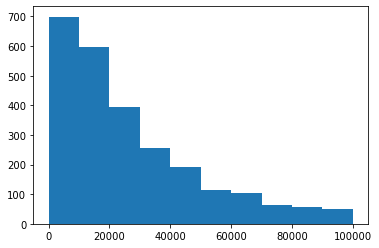

In [195]:
min_pop = df['Population'].min()
max_pop = df['Population'].max()
bins = [bin * 10000 for bin in np.arange(11)]
plt.hist(df['Population'], bins)
plt.show()

In [204]:
df['Population'].describe()

count    3.116000e+03
mean     1.033474e+05
std      3.311807e+05
min      1.020000e+02
25%      1.103275e+04
50%      2.585650e+04
75%      6.822400e+04
max      1.009805e+07
Name: Population, dtype: float64

In [205]:
pop_df = df.loc[(df['Population'] <= df['Population'].quantile(0.75)) & (df['Population'] >= df['Population'].quantile(0.25))]
mask_skeptic = 100 * (pop_df['Mask-Never'] + pop_df['Mask-Rarely'])
gw_skeptic = 100 * pop_df['GW-Not-Happening']
got_rona = pop_df['Cases']

In [206]:
agg = pop_df.agg({'Population' : ['mean', 'median'], 'Cases' : ['mean', 'median']})
agg['Population'] = agg['Population'].astype('int32')
agg['Cases'] = agg['Cases'].astype('int32')
agg

,Population,Cases
mean,29993,755
median,25856,593


r-squared: 0.017
p-value: 2.2197640251090023e-07


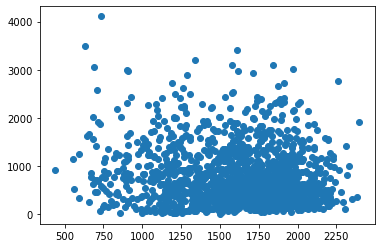

In [207]:
slope, intercept, r_value, p_value, std_err = sts.linregress(gw_skeptic, got_rona)
plt.scatter(gw_skeptic, got_rona)
print(f"r-squared: {round(r_value ** 2, 3)}")
print(f"p-value: {p_value}")

r-squared: 0.005
p-value: 0.0037860351340496183


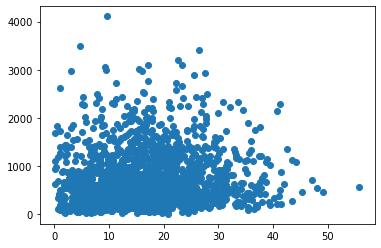

In [208]:
plt.scatter(mask_skeptic, got_rona)
slope, intercept, r_value, p_value, std_err = sts.linregress(mask_skeptic, got_rona)
print(f"r-squared: {round(r_value ** 2, 3)}")
print(f"p-value: {p_value}")